# Сборный проект I. Игровая индустрия

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нам данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Список рейтингов:

- RP — Rating Pending — рейтинг еще не получен.
- EC — Early Childhood — игры, целевой аудиторией которых являются дошкольники.
- E — Everyone — игры, предназначенные для широкой аудитории. Подходят для всех возрастов.
- E10+ — Everyone 10+ — игры, целевой аудиторией которых являются дети в возрасте до 10 лет.
- T — Teen — игры, целевой аудиторией которых являются подрости в возрасте 13 лет и старше.
- M — Mature — игры, целевой аудиторией которых являются люди в возрасте 17 лет и старше.
- AO — Adults Only — игры, целевой аудиторией которых являются люди в возрасте 18 лет и старше.

Предоставленные для анализа данные содержат следующую информацию.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Знакомство с данными

Импортируем необходимые библиотеки.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Импортируем исходные csv-файл, просматриваем первые 10 строк для визуализации данных, с которыми предстоит работать.

In [2]:
df = pd.read_csv('games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получаем базовую информацию о пропусках и типах данных для каждого столбца в исходной таблице.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод для шага 1

При первом знакомстве с данными уже можно сказать, что в таблице присутствует достаточно большое количество пропусков в столбцах, отвечающих за год выпуска, оценки критиков, оценки пользователей и рейтинг игр. По два значения отсутствует в столбцах, содержащих информацию о названии игр и жанр. Названия всех столбцов необходимо привести к нижнему регистру. Также следует отметить, что не для всех данных тип выбран корректно. Тип данных необходимо изменить на целочисленный для столбца "Year_of_Release" и на float для "User_Score".

## Шаг 2. Подготовка данных

Переименуем столбцы. Проверим.

In [4]:
df.columns = ['name', 'platform', 'year_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.head(5)

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посчитаем количество пропусков в каждом столбце и решим, что делать с пропущенными значениями. Для столбцов "name" и "genre" вполне подойдет простое удаление пропущенных значений, так как там всего по два пропущенных значения. То же можно сказать и про игры с незаполненным годом выхода. В столбцах "critic_score", "user_score", "rating" так сделать не получится, т. к. пропусков слишком многое. При их удалении потеряется слишком большое количество данных. Оставляем как есть, но будет учитывать пропуски в дальнейшей работе.

In [5]:
df.isna().sum()

name               2
platform           0
year_release     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64

Подробнее взглянем на каждый столбец. Удостоверимся, что в данных нет очевидных ошибок. Начнем со столбца "name", в котором содержится информация о названии игр.

In [6]:
df['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

Не все названия игр уникальны. Попытаемся разобраться, взглянув на игру с самым большим количеством повторов. Все в порядке, в таблице одна и та же игра может быть указана несколько раз, так как издавалась на разных платформах, поэтому и записей будет несколько.

In [7]:
df.loc[df['name'] == "Need for Speed: Most Wanted"]

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Столбец "platform" содержит информацию о платформах, на которых выпускались игры. Платформ достаточно много. Сразу же видно, насколько они отличаются по популярности. В таблице ниже — распределение платформ по количеству выпущенных игр с 1985 по 2016 год.

In [8]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Убедимся, что в столбце нет аномальных наблюдений. Для этого составим новую таблицу, в которую добавим первый и последний год выхода игр для каждой платформы.

In [9]:
df_year_check = df.groupby('platform').agg({'year_release' : [np.min, np.max]}).sort_index()
df_year_check.head(10)

year_release        
                 amin    amax
platform                     
2600           1980.0  1989.0
3DO            1994.0  1995.0
3DS            2011.0  2016.0
DC             1998.0  2008.0
DS             1985.0  2013.0
GB             1988.0  2001.0
GBA            2000.0  2007.0
GC             2001.0  2007.0
GEN            1990.0  1994.0
GG             1992.0  1992.0

Также добавим разницу между этими значениями, чтобы оценить интервал, в течение которого платформа оставалась относительно востребованной.

In [10]:
df_year_check['dif'] = df_year_check[('year_release', 'amax')] - df_year_check[('year_release', 'amin')]
df_year_check.loc[df_year_check['dif'] > 10]

year_release           dif
                 amin    amax      
platform                           
DS             1985.0  2013.0  28.0
GB             1988.0  2001.0  13.0
NES            1983.0  1994.0  11.0
PC             1985.0  2016.0  31.0
PS2            2000.0  2011.0  11.0
PSP            2004.0  2015.0  11.0
X360           2005.0  2016.0  11.0

Аномально долго (больше 10 лет) на рынке оставались только несколько платформ: DS, GB, NES, PC, PS2, PSP, X360. Проверим даты их выхода в открытых источниках, сверим их с полученными ранее данными. Отметим, что компьютер отличается от игровых приставок тем, что в соответствующую категорию попадают все системы вне зависимости от года.

- DS — 2004
- GB — 1989
- NES — 1983
- PC — NA
- PS2 — 2000
- PSP — 2004
- X360 — 2005

Из всего списка вопросы вызывает только DS, так как в соответствии с имеющимися данными первая игра на эту приставку вышла в 1985 года, хотя сама приставка появилась лишь в 2004. Узнаем количество таких наблюдений.

In [11]:
df.query('platform == "DS" & year_release < 2004')

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


Только одно наблюдение. Удаляем, сбрасываем индекс.

In [12]:
df = df.drop([15957]).reset_index()

Данные в столбце "year_release" выглядят следующим образом. Диапазон лет выхода игр — с 1985 по 2016 год. 25% всех игр вышло до 2003 года. 50% всех игр вышло до 2007 года. После 2010 вышло 25% всех игр.

In [13]:
df['year_release'].describe()

count    16445.000000
mean      2006.485923
std          5.874840
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_release, dtype: float64

Рассмотрим столбец "genre". Видим, что игры распределены по жанрам неравномерно. Такие жанры как action и sports оказались куда популярнее, чем strategy или puzzle. Впрочем, это только количество игр. Возможно, распределение прибыли по жанрам выглядит иначе.

In [14]:
df['genre'].value_counts()

Action          3368
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

В столбце "na_sales" содержится информация о продаже игр на территории Северной Америки. Единица измерения — миллионы долларов США. Можно было бы перевести значения в миллионы, но это сделало бы таблицу менее читаемой и затруднило бы навигацию по графикам.

In [15]:
df['na_sales'].describe()

count    16714.000000
mean         0.263393
std          0.813625
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

То же для продаж на территории Европы.

In [16]:
df['eu_sales'].describe()

count    16714.000000
mean         0.145068
std          0.503352
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

И Японии.

In [17]:
df['jp_sales'].describe()

count    16714.000000
mean         0.077621
std          0.308862
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

В столбец "other_sales" попали данные о продажах за пределами указанных выше регионов, которые в игровой индустрии традиционно считаются приоритетными.

In [18]:
df['other_sales'].describe()

count    16714.000000
mean         0.047345
std          0.186736
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Столбец "critic_score" содержит информацию о средней оценке игры, полученной от критиков. Значения находятся в диапазоне от 13 до 98, что говорит о том, что игра с самым низким рейтингом была оценена на 13 баллов из 100, а игра с максимальным — на 98 из 100.

In [19]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Пользовательские оценки измеряются несколько иначе, по шкале от 0 до 10 баллов. К тому же, в этом столбце содержатся значения 'tbd' (от англ. "to be determined", еще не определен). Именно из-за них столбцу присвоен тип данных object, что в последующем помешает в вычислениях. Избавимся от этих значений чуть позже, на этапе обработки данных.

In [20]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

Столбец "rating" содержит информацию о рейтинге игр, выданном американской организацией Entertainment Software Rating Board (ESRB). Каждой категории соответствует своя аббревиатура. Всего их 8. Разграничения в основном проводятся по минимальному возрасту игрока, для которого организация посчитает игру приемлемой. Видно, насколько отличается количество игр, выпущенных для общей аудитории (E) и только для взрослых (AO).

In [21]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Удаляем пропущенные значения там, где это возможно сделать без ущерба для качества выборки. Таких столбцов всего три: "name", "year_release", "genre". Проверяем количество пропусков после операции.

In [22]:
df = df.dropna(subset = ['name', 'year_release', 'genre']).reset_index(drop=True)
df.isna().sum()

index              0
name               0
platform           0
year_release       0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8460
user_score      6604
rating          6675
dtype: int64

Меняем тип данных на целочисленный в столбце "year_release", так как год выхода игры может быть только целым числом.

In [23]:
df['year_release'] = df['year_release'].astype('int')
df.head()

,index,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы уже обращали внимание на значения "tbd", которые встречаются в столбце "user_score". Проверим, сколько их.

In [24]:
print(len(df.query('user_score == "tbd"')))

2376


Достаточно много, больше 2000. Заменим "tbd" на NaN, ведь по сути, tbd — это плейсхолдер для отсутствующих значений, но с ним невозможно выполнять математические операции. К тому же, всему столбцу присваивается некорректный тип данных.

In [25]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(len(df.query('user_score == "tbd"')))

0


После предварительной обработки таблица выглядит следующим образом. Мы изменили тип данных там, где это было необходимо и удалили сроки с пропущенными значениями там, где это было необходимо. В прочих случаях оставили пропуски, ведь они не помешают нам в будущем.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         16443 non-null  int64  
 1   name          16443 non-null  object 
 2   platform      16443 non-null  object 
 3   year_release  16443 non-null  int32  
 4   genre         16443 non-null  object 
 5   na_sales      16443 non-null  float64
 6   eu_sales      16443 non-null  float64
 7   jp_sales      16443 non-null  float64
 8   other_sales   16443 non-null  float64
 9   critic_score  7983 non-null   float64
 10  user_score    7463 non-null   float64
 11  rating        9768 non-null   object 
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


Так как мы изменили тип данных в столбце "user_score" на целочисленный, то теперь можем получить более подробную информацию о значениях в нем. Оценки находятся в диапазоне от 0 до 9.7 баллов, среднее значение — 7.13, медианное — 7.5, что говорит о положительной скошенности датасета.

In [27]:
df['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Добавляем столбец с глобальными продажами. Для этого сложим данные для всех четырех регионов. Посмотрим, что получилось.

In [28]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,index,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Проверим таблицу на наличие грубых дубликатов. Их нет.

In [29]:
df.duplicated().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         16443 non-null  int64  
 1   name          16443 non-null  object 
 2   platform      16443 non-null  object 
 3   year_release  16443 non-null  int32  
 4   genre         16443 non-null  object 
 5   na_sales      16443 non-null  float64
 6   eu_sales      16443 non-null  float64
 7   jp_sales      16443 non-null  float64
 8   other_sales   16443 non-null  float64
 9   critic_score  7983 non-null   float64
 10  user_score    7463 non-null   float64
 11  rating        9768 non-null   object 
 12  total_sales   16443 non-null  float64
dtypes: float64(7), int32(1), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод для шага 2

В данных обнаружилось некоторое количество проблем и аномалий. На данном этапе мы удалили строки с пропусками в столбцах "name", "genre" и "year_release". В то же время оставили пропуски в столбцах "critic_score", "user_score" и "rating", так как пропущенных значений слишком много, а их удаление приведет к потере слишкой большой части информации. Значения "tbd" в столбце "user_score" наоборот заменили на NaN, так как с ними в данном случае проще проводить математические операции. Тип данных в столбце "year_release" исправили на целочисленный. Убедились в том, что в таблице нет грубых дубликатов. Наконец, добавили столбец с глобальными продажами для каждой игры.

## Шаг 3. Исследовательский анализ данных

В данном разделе рассчитаем несколько ключевых показателей.

#### Общее количество игр по годам

In [31]:
df['year_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      13
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_release, dtype: int64

In [32]:
df_hist = pd.DataFrame(df['year_release'].value_counts().sort_index())
df_hist

,year_release
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,15
1989,17


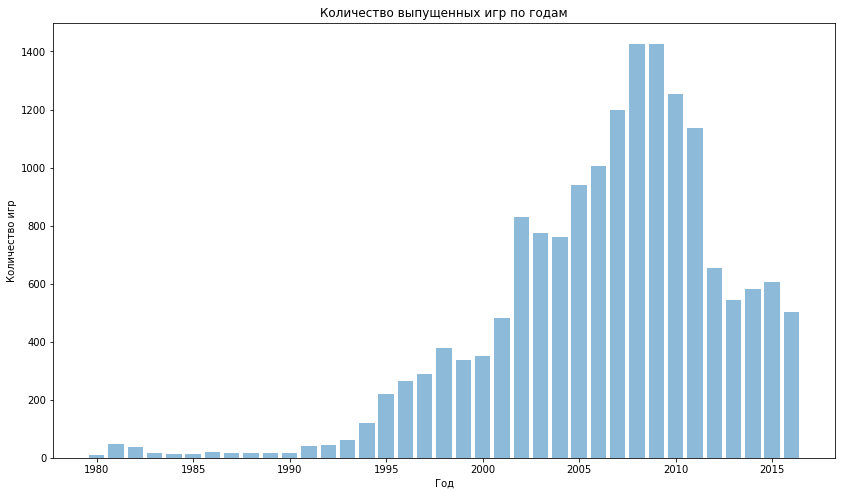

In [33]:
plt.figure(figsize=(14, 8))
plt.bar(df_hist.index, df_hist['year_release'], alpha=0.5)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Заметно как меняется количество выпускаемых игр в зависимости от года. Количество игр имеет устойчивую тенденцию к росту на временном отрезке от 1985 до 2008 года. Наибольшее количество игр было выпущено в 2008 году — 1427. В 2009 — всего на одну игру меньше. С 2009 года количество ежегодно выпускаемых игр начинает резко падать. Для того, чтобы сделать прогнозы на 2017 год, пригодятся далеко не все данные, так как очевидно, что данные 1985 или 1990 года уже не являются релевантными.

#### Топ платформ по продажам за все время

Определим платформы с максимальными продажами за все время. Для этого сгруппируем исходный датафрейм по столбцу "platform" и рассчитаем суммарное значение для столбца "total_sales", отсортируем по убыванию.

In [34]:
top_10_platforms = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = sum).sort_values(by = 'total_sales', ascending = False).head(10)
top_10_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Получаем список самых популярных игровых платформ за все время. Сохраняем его в списке для дальнейшей работы.

In [35]:
consoles = list(top_10_platforms.index.values)

Теперь составляем таблицу, в которой игры сгруппированы по платформам и году выхода, считаем по-прежнему суммарную выручку.

In [36]:
top_platforms_year = df.pivot_table(index = ['platform', 'year_release'], values = 'total_sales', aggfunc = sum)
top_platforms_year = pd.DataFrame(top_platforms_year.to_records())
top_platforms_year = top_platforms_year.loc[top_platforms_year.loc[:, 'platform'].isin(consoles)]
top_platforms_year

,platform,year_release,total_sales
12,3DS,2011,63.20
13,3DS,2012,51.36
14,3DS,2013,56.57
15,3DS,2014,43.76
16,3DS,2015,27.78
...,...,...,...
219,X360,2012,99.74
220,X360,2013,88.58
221,X360,2014,34.74
222,X360,2015,11.96


Построим график продаж по годам для 10 самых популярных за все время игровых платформ. Таким образом оценим средний срок жизни одной платформы, что при необходимости позволит нам сделать более точный прогноз на 2017 год.

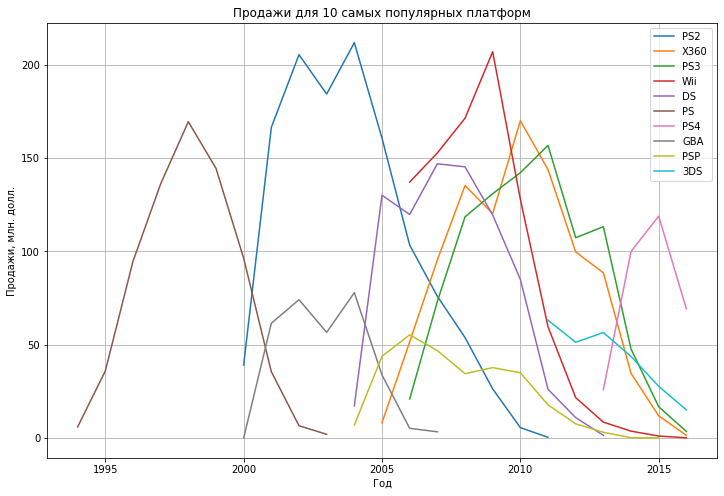

In [37]:
plt.figure(figsize = (12, 8))
for element in consoles:
    x = top_platforms_year.loc[top_platforms_year['platform'] == element]['year_release']
    y = top_platforms_year.loc[top_platforms_year['platform'] == element]['total_sales']
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн. долл.')
    plt.plot(x, y)
    plt.title('Продажи для 10 самых популярных платформ')
    plt.legend(element)
    plt.grid(True)

plt.legend(consoles)    
plt.show()

Представим ту же информацию на отдельном графике для каждой платформы, там легче будет оценить периоды роста и падения продаж для каждой платформы в отдельности.

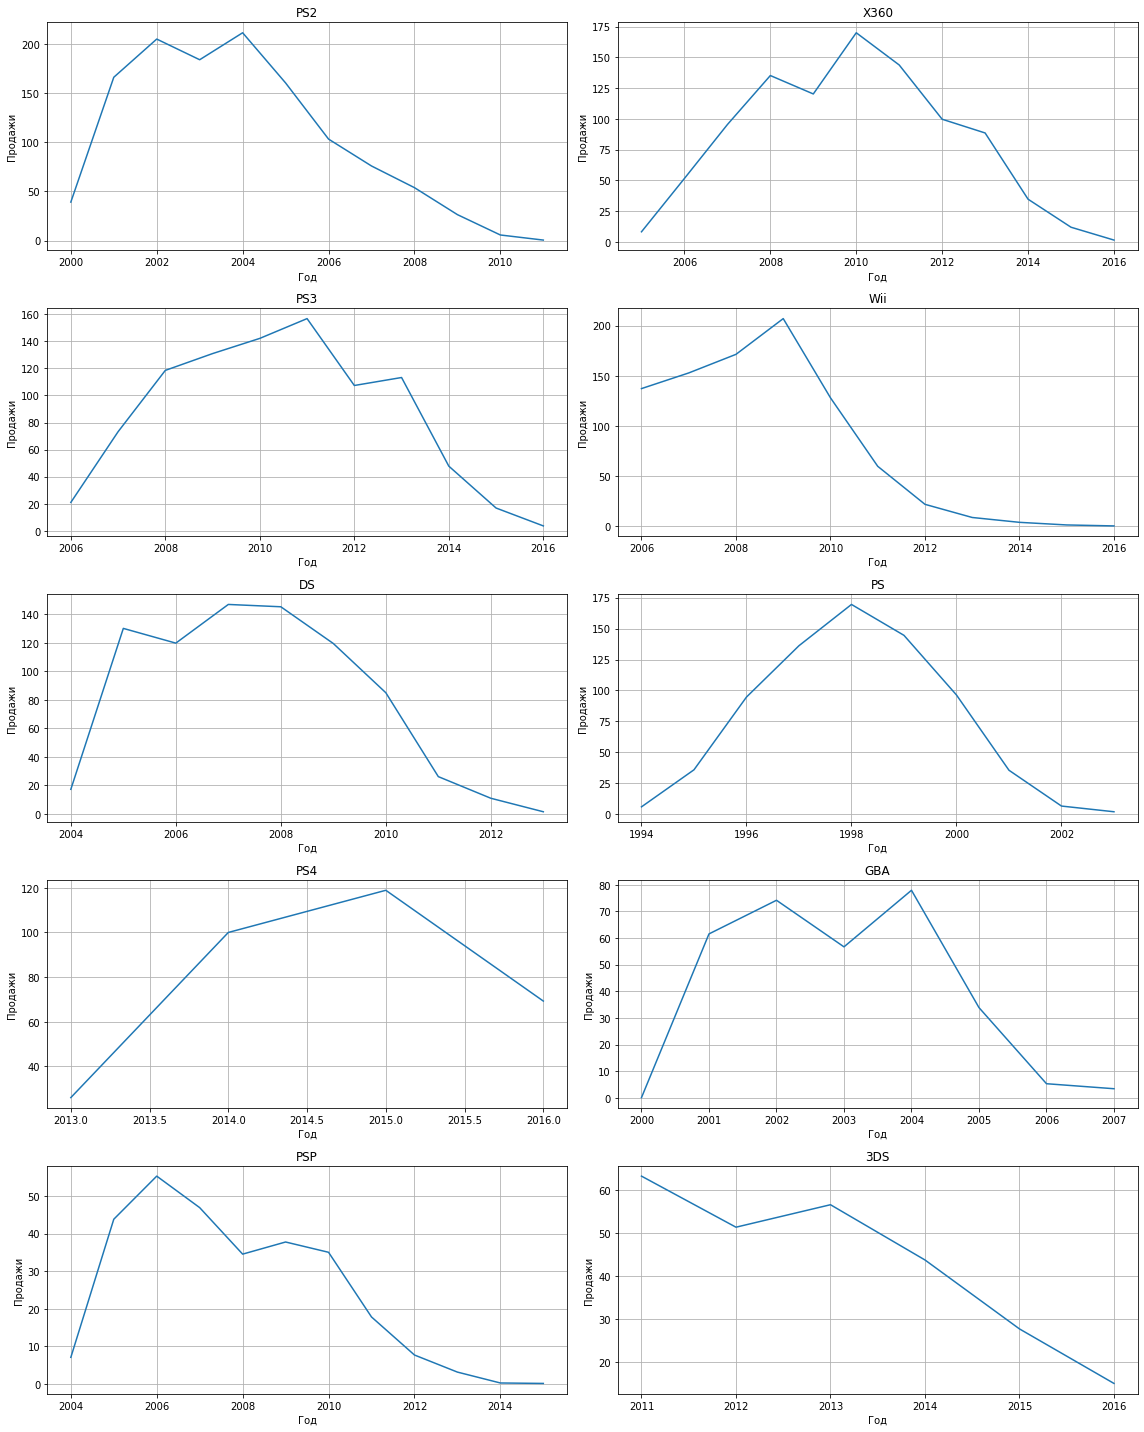

In [38]:
plt.figure(figsize=(16, 20))

for i in range(len(consoles)):
    plt.subplot(5, 2, i+1)
    x = top_platforms_year.loc[top_platforms_year['platform'] == consoles[i]]['year_release']
    y = top_platforms_year.loc[top_platforms_year['platform'] == consoles[i]]['total_sales']
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.plot(x, y)
    plt.title(consoles[i])
    plt.grid(True)
plt.tight_layout()
plt.show()

Вопросы вызывает только PS4 с дробными количеством лет. Убедимся в том, что это только способ нанесения данных на график, а не ошибка в данных. Убедимся в том, что все значения целые и проблемы здесь нет.

In [39]:
top_platforms_year.query('platform == "PS4"')

,platform,year_release,total_sales
152,PS4,2013,25.99
153,PS4,2014,100.00
154,PS4,2015,118.90
155,PS4,2016,69.25


У большинства платформ, вошедших в топ 10 по продажам за все время, срок, после которого рост продаж сменяется падением составляет от 3 до 5 лет. Период активных продаж для представленных выше платформ, выпущенных более 10 лет назад, составляет от 9 до 11 лет. В среднем около 10 лет. 

Рассчитаем средний срок жизни платформы по количеству выпускаемых игр, для этого сравним год выпуска первой и последней игры для соответствующей платформы. Сначала получаем сборную таблицу для всех платформ.

In [40]:
df_lifetime = df.groupby('platform').agg({'year_release' : [np.min, np.max]}).sort_index()
df_lifetime['dif'] = df_lifetime[('year_release', 'amax')] - df_lifetime[('year_release', 'amin')]
df_lifetime.head(10)

year_release       dif
                 amin  amax    
platform                       
2600             1980  1989   9
3DO              1994  1995   1
3DS              2011  2016   5
DC               1998  2008  10
DS               2004  2013   9
GB               1988  2001  13
GBA              2000  2007   7
GC               2001  2007   6
GEN              1990  1994   4
GG               1992  1992   0

Теперь отфильтруем ее так, чтобы оставить только платформы, вошедшие в топ 10 за все время.

In [41]:
df_lifetime_flat = pd.DataFrame(df_lifetime.to_records()).reset_index(drop=True)
df_lifetime_flat.columns = ['platform', 'year_min', 'year_max', 'dif']
df_lifetime_flat.query('platform in @consoles')

,platform,year_min,year_max,dif
2,3DS,2011,2016,5
4,DS,2004,2013,9
6,GBA,2000,2007,7
15,PS,1994,2003,9
16,PS2,2000,2011,11
17,PS3,2006,2016,10
18,PS4,2013,2016,3
19,PSP,2004,2015,11
26,Wii,2006,2016,10
28,X360,2005,2016,11


Рассчитаем средний срок жизни на основании полученных данных. Он составляет 8.6 лет, что очень близко к полученному другим способом значению.

In [42]:
df_lifetime_flat.query('platform in @consoles')['dif'].mean()

8.6

#### Актуальные данные

Для большинства консолей в списке выше, появившихся более 10 лет назад, характерен период жизни от 9 до 10 лет. Для расчета показателей на 2017 год будем использовать данные, начиная с 2008 года. Таким образом, получим период длиной в 9 лет. Значит, в него попадут все платформы, еще актуальные на 2017 год. Но так как в такой список попадут и платформы, выпущенные более 10 лет назад, отсеим те, общие продажи для которых в 2016 были равны нулю. 

In [43]:
df_pivot = df.query('year_release > 2007').pivot_table(index = 'platform', columns = 'year_release', values = 'total_sales', aggfunc = sum).fillna(0)
df_pivot.columns = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
df_pivot_sorted = df_pivot.loc[df_pivot['2016'] > 0]
df_pivot_flat = pd.DataFrame(df_pivot_sorted.to_records())
df_pivot_flat

,platform,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,3DS,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
1,PC,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
2,PS3,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
3,PS4,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25
4,PSV,0.00,0.00,0.00,4.63,16.19,10.59,11.90,6.25,4.25
5,Wii,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
6,WiiU,0.00,0.00,0.00,0.00,17.56,21.65,22.03,16.35,4.60
7,X360,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52
8,XOne,0.00,0.00,0.00,0.00,0.00,18.96,54.07,60.14,26.15


In [44]:
new_platforms = df_pivot_flat['platform']
new_platforms

0     3DS
1      PC
2     PS3
3     PS4
4     PSV
5     Wii
6    WiiU
7    X360
8    XOne
Name: platform, dtype: object

#### Перспективные платформы

На данном этапе нам необходимо составить список перспективных платформ. Очевидно, что ими станут платформы с наибольшими ожидаемыми продажами в 2017 году. Для этого преобразовываем таблицу так, чтобы построить график.

In [45]:
df_pivot_flat_t = df_pivot_flat.transpose()
df_pivot_flat_t.columns = df_pivot_flat_t.iloc[0]
df_pivot_flat_t = df_pivot_flat_t.iloc[1:]
df_pivot_flat_t

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
2008,0,12.42,118.52,0,0,171.32,0,135.26,0
2009,0,16.91,130.93,0,0,206.97,0,120.29,0
2010,0,24.28,142.17,0,0,127.95,0,170.03,0
2011,63.2,35.03,156.78,0,4.63,59.65,0,143.84,0
2012,51.36,23.22,107.36,0,16.19,21.71,17.56,99.74,0
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100,11.9,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.9,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.6,69.25,4.25,0.18,4.6,1.52,26.15


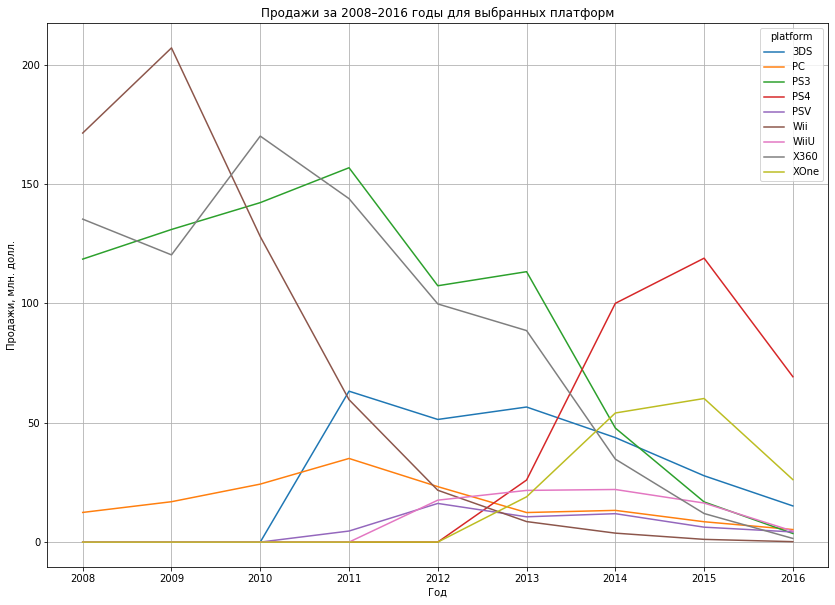

In [46]:
df_pivot_flat_t.plot(legend=True, figsize = (14, 10), grid=True)
plt.title('Продажи за 2008–2016 годы для выбранных платформ')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. долл.')
plt.show()

В топ 3 игровых платформ по всему миру в 2015 и 2016 вошли PlayStation 4, XBox One и Nintendo 3DS. При этом, в 2014 году PS4 и XBox One уже занимали первое и второе место соответственно, а 3DS располагалась на 4 месте рейтинга.

**ВАЖНО:** нельзя утверждать, что в 2016 наблюдается падение продаж для всех выбранных платформ. В задании указано, что данные за 2016 могут быть неполными. Логично предположить, что имеется информация только за часть года.

#### Продажи по играм

Рассчитаем, насколько продажи каждой игры отличаются в зависимости от выпускаемой платформы. Для этого на основе оригинального датафрейма составим таблицу с информацией о продажах для каждой игры на каждой платформе.

In [47]:
df_games = pd.DataFrame(df.groupby(['name', 'platform'])['total_sales'].sum())
df_games_new = pd.DataFrame(df_games.to_records())
df_games_new.head(10)

,name,platform,total_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Frozen: Olaf's Quest,DS,0.51
4,Haikyu!! Cross Team Match!,3DS,0.04
5,Tales of Xillia 2,PS3,0.84
6,'98 Koshien,PS,0.40
7,.hack//G.U. Vol.1//Rebirth,PS2,0.17
8,.hack//G.U. Vol.2//Reminisce,PS2,0.23
9,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,0.16


Посмотрим на то, как распределены данные по продажам в зависимости от платформы.

In [48]:
platform_list = ['PS4', 'XOne', '3DS']

for i in range (len(platform_list)):
    print(platform_list[i], df_games_new.loc[df_games_new['platform'] == platform_list[i]]['total_sales'].describe())
    print()

PS4 count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

XOne count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

3DS count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: total_sales, dtype: float64



Больше всего игр вышло на 3DS. На втором месте по количеству игр — PS4. XBox One — на третьем. Средние показатели продаж для игр также различаются.

Среднее значение:
- 503 535 USD для 3DS
- 801 378 USD для PS4
- 645 020 USD для XBox One

Медиана:
- 120 000 USD для 3DS
- 200 000 USD для PS4
- 220 000 USD для XBox One

Для всех трех платформ медиана гораздо меньше среднего, что говорит о большом количестве игр с невысокими продажами и небольшом количестве абсолютных хитов, выручка от продажи которых измеряется миллионами долларов.

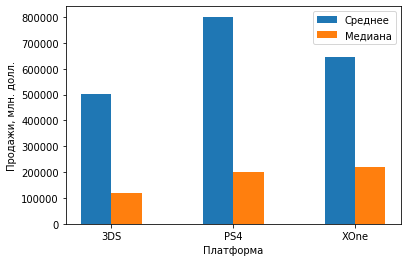

In [49]:
N = 3
x_1 = [503535, 801378, 645020]
x_2 = [120000, 200000, 220000]

ind = np.arange(N) 
labels = ['3DS', 'PS4', 'XOne']
width = 0.25

plt.bar(ind, x_1, width = 0.25)
plt.bar(ind + width, x_2, width = 0.25)

plt.xticks(ind + width / 2, labels)
plt.ylabel('Продажи, млн. долл.')
plt.xlabel('Платформа')
plt.legend(['Среднее', 'Медиана'])
plt.show()

На графике видно, насколько близки друг к другу медианные значения для XBox и PS4, а вот средние значения серьезно различаются.

Построим графики распределения продаж для трех платформ.

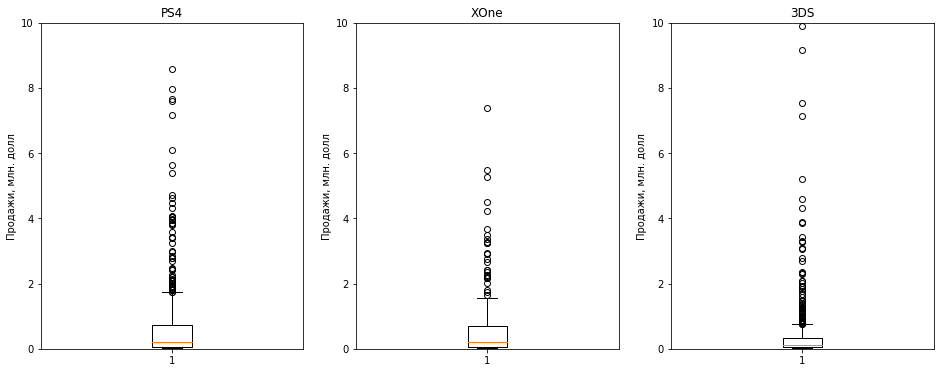

In [50]:
platform_list = ['PS4', 'XOne', '3DS']

plt.figure(figsize=(16, 6))

for i in range (len(platform_list)):
    plt.subplot(1, 3, i+1)
    x = df_games_new.loc[df_games_new['platform'] == platform_list[i]]['total_sales']
    plt.boxplot(x)
    plt.title(platform_list[i])
    plt.ylim(0, 10)
    plt.ylabel('Продажи, млн. долл')
    
plt.show()

Визуально заметно, что у Nintendo 3DS самый высокий разброс значений, но большая часть наблюдений сконцентрирована ближе к нулю, так как медианное значение для этой платформы заметно ниже. Граница для выбросов также находится гораздо ниже, чем для двух оставшихся платформ. PS4 и XOne выглядят куда более единообразно.

То же, но в большем приближении.

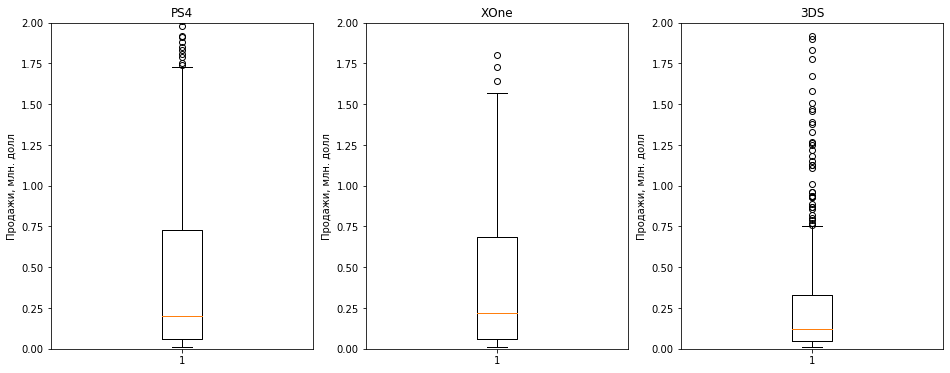

In [51]:
platform_list = ['PS4', 'XOne', '3DS']

plt.figure(figsize=(16, 6))

for i in range (len(platform_list)):
    plt.subplot(1, 3, i+1)
    x = df_games_new.loc[df_games_new['platform'] == platform_list[i]]['total_sales']
    plt.boxplot(x)
    plt.title(platform_list[i])
    plt.ylim(0, 10)
    plt.ylabel('Продажи, млн. долл')
    plt.ylim(0, 2)
plt.show()

Опять же, заметно, насколько меньше размер межквартильного размаха у Nintendo 3DS. Разброс значений, оказавшихся в его пределах, ниже чем у PlayStation 4 и XBox One. Медиана также расположена гораздо ближе к нулю. Несмотря на различия в верхней границе выбросов, выборки для XOne и PS4 в целом достаточно похожи друг на друга.

Посмотрим на разброс значений продаж для всех актуальных игровых платформ.

In [52]:
df_games.query('platform in @new_platforms').describe()

,total_sales
count,6505.000000
mean,0.600583
std,1.838262
min,0.000000
25%,0.050000
50%,0.170000
75%,0.530000
max,82.540000


Построим график типа "ящик с усами" для данной выборки. Бросается в глаза то, насколько выбросы отличаются от значений, попавших в межквартильный размах. Это говорит о том, что для выбранных платформ характерно большое количество игр с невысокими продажами и небольшое количество игр, выручка которых оказалась феноменально большой.

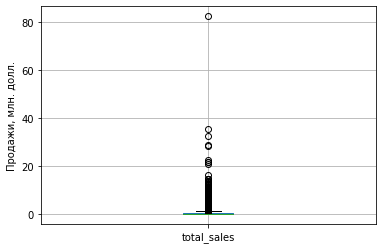

In [53]:
df_games.query('platform in @new_platforms').boxplot()
plt.ylabel('Продажи, млн. долл.')
plt.show()

Посмотрим на тот же график, но в большем приближении. Видим, что граница между значениями, попавшими в диапазон (Q1-1.5IQR; Q3+1.5IQR)проходит по 1.25 млн. долл. Все игры, глобальные продажи которых оказались больше, относятся к аномальным значениям.

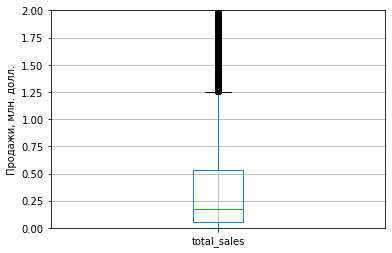

In [54]:
df_games.query('platform in @new_platforms').boxplot()
plt.ylabel('Продажи, млн. долл.')
plt.ylim(0, 2)
plt.show()

#### Влияние отзывов критиков на продажи

Выясним, как отзывы критиков влияют на продажи. В отличие от ситуации с объемом продаж, здесь аномальными являются не сверхвысокие, а сверхнизкие значения.

Text(0, 0.5, 'Оценка критиков')

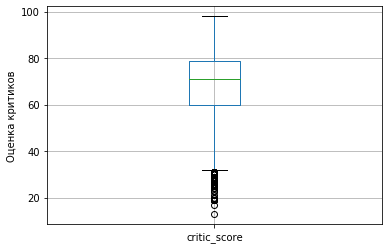

In [55]:
df.boxplot(column='critic_score').set_ylabel('Оценка критиков')

Избавимся от выбросов для проведения дальнейшего анализа, очищенную таблицу поместим в новый датафрейм, который будет использоваться только в данной операции (по причине отсутствия большинства значений по причине наличия пропусков в столбце "critic_score"). Рассчитаем количество наблюдений до и после, чтобы узнать, какой процент значений был удален.

In [56]:
crit_old_len = len(df[~np.isnan(df['critic_score'])])
print('Наблюдений до:', crit_old_len)

Наблюдений до: 7983


In [57]:
df_critic = df.dropna(subset = ['critic_score'])
q_l_cr = df_critic['critic_score'].quantile(0.02)
q_h_cr = df_critic['critic_score'].quantile(0.98)
df_critic = df_critic.query('@q_h_cr > critic_score > @q_l_cr')

Text(0, 0.5, 'Оценка критиков')

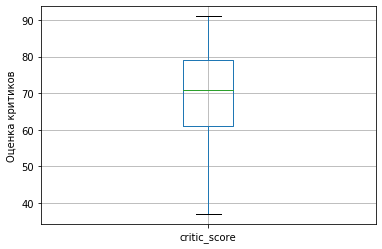

In [58]:
df_critic.boxplot(column='critic_score').set_ylabel('Оценка критиков')

In [59]:
crit_new_len = len(df_critic)
print('Наблюдений после:', crit_new_len)

Наблюдений после: 7622


Проверяем процент удаленных наблюдений. Убеждаемся в том, что он не превышает 5%. Значит, все в порядке, удаление выбросов произведено успешно.

In [60]:
'Удалено наблюдений: {:.1%}'.format((crit_old_len - crit_new_len) / crit_old_len)

'Удалено наблюдений: 4.5%'

Выясним характер и силу связи между продажами игры и отзывами критиков на нее на примере PlayStation 4.

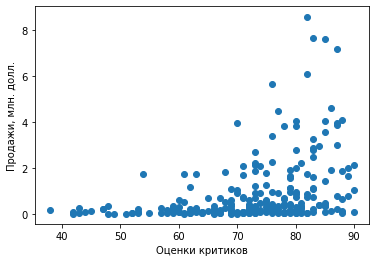

In [61]:
x_ps4 = df_critic.query('year_release > 2007 & platform == "PS4"')['critic_score']
y_ps4 = df_critic.query('year_release > 2007 & platform == "PS4"')['total_sales']
plt.scatter(x = x_ps4, y = y_ps4)
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи, млн. долл.')
plt.show()

In [62]:
print('Коэффициент корреляции Пирсона равен {:.2f}'.format(x_ps4.corr(y_ps4)))

Коэффициент корреляции Пирсона равен 0.38


Если судить по графику выше и коэффициенту корреляции, можно сделать вывод о том, что линейная зависимость между двумя величинами достаточно слаба. Тем не менее, видно, что только игры, получившие относительно высокий рейтинг (более 70), смогли продемонстрировать рекордно высокий уровень продаж (даже после удаления выбросов).

Взглянем на график и коэффициенты корреляции Пирсона для двух других платформ из актуального топ-3, XBox One и Nintendo 3DS.

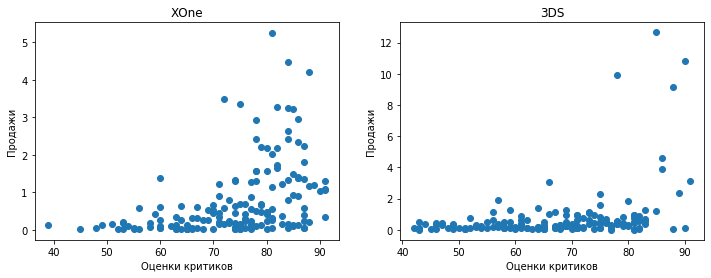

In [63]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
x_x1 = df_critic.query('year_release > 2007 & platform == "XOne"')['critic_score']
y_x1 = df_critic.query('year_release > 2007 & platform == "XOne"')['total_sales']
plt.scatter(x = x_x1, y = y_x1)
plt.title('XOne')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.subplot(1, 2, 2)
x_3ds = df_critic.query('year_release > 2007 & platform == "3DS"')['critic_score']
y_3ds = df_critic.query('year_release > 2007 & platform == "3DS"')['total_sales']
plt.scatter(x = x_3ds, y = y_3ds)
plt.title('3DS')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.show()

In [64]:
print('Коэффициент корреляции Пирсона для XOne равен {:.2f}'.format(x_x1.corr(y_x1)))
print('Коэффициент корреляции Пирсона для 3DS равен {:.2f}'.format(x_3ds.corr(y_3ds)))

Коэффициент корреляции Пирсона для XOne равен 0.42
Коэффициент корреляции Пирсона для 3DS равен 0.35


В целом, картина очень похожа. Линейная связь между двумя величинами не является выраженной, однако, как и прежде, можно утверждать, что игр с низкими оценками и высокими продажами в выборке практически нет, в то время как практически все игры с высоким уровнем продаж получили оценки выше 70.

#### Влияние отзывов игроков на продажи

Теперь выясним, как отзывы игроков влияют на продажи. Здесь, также как и в предыдущем случае, аномальными являются сверхнизкие значения.

Text(0, 0.5, 'Оценка игроков')

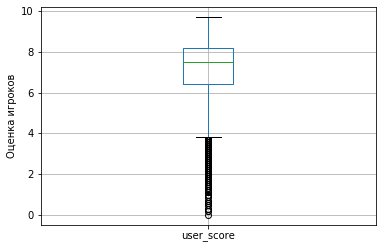

In [65]:
df.boxplot(column='user_score').set_ylabel('Оценка игроков')

Избавимся от выбросов для проведения дальнейшего анализа, очищенную таблицу поместим в новый датафрейм, который будет использоваться только в данной операции (по причине отсутствия большинства значений по причине наличия пропусков в столбце "user_score"). Рассчитаем количество наблюдений до и после, чтобы узнать, какой процент значений был удален.

In [66]:
us_old_len = len(df[~np.isnan(df['user_score'])])
print('Наблюдений до:', us_old_len)

Наблюдений до: 7463


In [67]:
df_user = df.dropna(subset = ['user_score'])
q_l_us = df_user['user_score'].quantile(0.02)
q_h_us = df_user['user_score'].quantile(0.98)
df_user = df_user.query('@q_h_us > user_score > @q_l_us')

Text(0, 0.5, 'Оценка игроков')

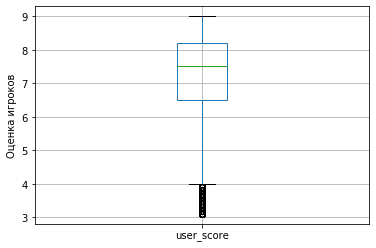

In [68]:
df_user.boxplot(column='user_score').set_ylabel('Оценка игроков')

In [69]:
us_new_len = len(df_user)
print('Наблюдений после:', us_new_len)

Наблюдений после: 7118


Проверяем процент удаленных наблюдений. Убеждаемся в том, что он не превышает 5%. Значит, все в порядке, удаление выбросов произведено успешно.

In [70]:
'Удалено наблюдений: {:.1%}'.format((us_old_len - us_new_len) / us_new_len)

'Удалено наблюдений: 4.8%'

Выясним характер и силу связи между продажами игры и отзывами критиков на нее на примере PlayStation 4.

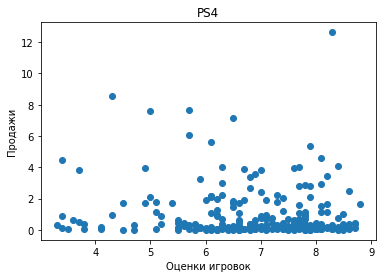

In [71]:
x_ps4 = df_user.query('year_release > 2007 & platform == "PS4"')['user_score']
y_ps4 = df_user.query('year_release > 2007 & platform == "PS4"')['total_sales']
plt.scatter(x = x_ps4, y = y_ps4)
plt.title('PS4')
plt.xlabel('Оценки игровок')
plt.ylabel('Продажи')
plt.show()

In [72]:
print('Коэффициент корреляции Пирсона для PS4 равен {:.2f}'.format(x_ps4.corr(y_ps4)))

Коэффициент корреляции Пирсона для PS4 равен -0.11


Можно утверждать, что линейная связь между двумя величинами отсутствует. Игры с любыми пользовательскими оценками могут показать как высокие, так и низкие продажи.

Взглянем на график и коэффициенты корреляции Пирсона для двух других платформ из актуального топ-3, XBox One и Nintendo 3DS.

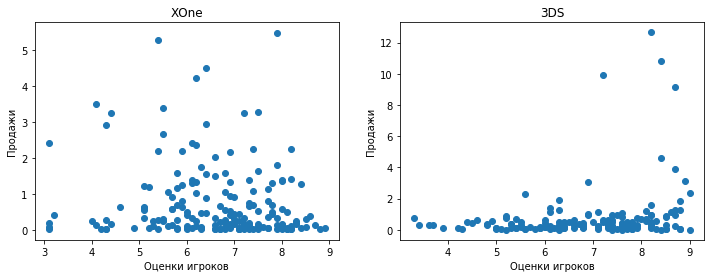

In [73]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
x_x1 = df_user.query('year_release > 2007 & platform == "XOne"')['user_score']
y_x1 = df_user.query('year_release > 2007 & platform == "XOne"')['total_sales']
plt.scatter(x = x_x1, y = y_x1)
plt.title('XOne')
plt.xlabel('Оценки игроков')
plt.ylabel('Продажи')

plt.subplot(1, 2, 2)
x_3ds = df_user.query('year_release > 2007 & platform == "3DS"')['user_score']
y_3ds = df_user.query('year_release > 2007 & platform == "3DS"')['total_sales']
plt.scatter(x = x_3ds, y = y_3ds)
plt.title('3DS')
plt.xlabel('Оценки игроков')
plt.ylabel('Продажи')

plt.show()

In [74]:
print('Коэффициент корреляции Пирсона для XOne равен {:.2f}'.format(x_x1.corr(y_x1)))
print('Коэффициент корреляции Пирсона для 3DS равен {:.2f}'.format(x_3ds.corr(y_3ds)))

Коэффициент корреляции Пирсона для XOne равен -0.12
Коэффициент корреляции Пирсона для 3DS равен 0.22


Видим, что картина в целом очень похожа. Линейная связь отсутствует. Можно с уверенностью утверждать, что оценки игроков в целом не влияют на продажи ни на одной из трех платформ.

#### Распределение игр по жанрам

Выясним, как распределены игры по жанрам на платформах, которые еще будут актуальны в 2017 году. Напомним, что список этих платформ выглядит следующим образом:

In [75]:
new_platforms

0     3DS
1      PC
2     PS3
3     PS4
4     PSV
5     Wii
6    WiiU
7    X360
8    XOne
Name: platform, dtype: object

Количество игр каждого жанра:

In [76]:
df_recent = df[(df['year_release'] > 2007) & (df['platform'].isin(new_platforms))]
df_recent_count = pd.DataFrame(df_recent['genre'].value_counts())
df_recent_count

,genre
Action,1562
Sports,735
Misc,621
Shooter,541
Role-Playing,510
Adventure,415
Racing,328
Simulation,229
Fighting,221
Strategy,194


Построим график распределения игр по жанрам для того, чтобы было легче визуально оценить относительное количество игр того или иного жанра.

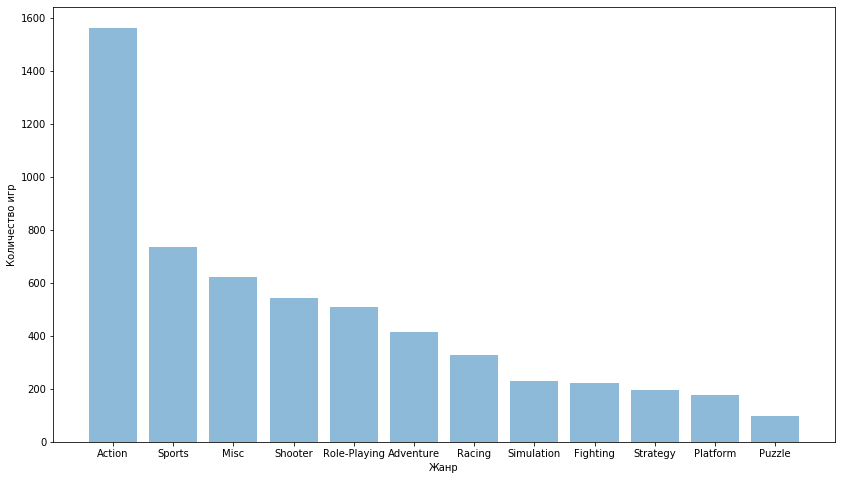

In [77]:
plt.figure(figsize=(14, 8))
plt.bar(df_recent_count.index, df_recent_count['genre'], alpha=0.5)
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

Видим, что для всех платформ в совокупности с большим отрывом лидируют игры жанра Action, на втором месте спортивные симуляторы, на третьем игры с несколькими жанрами / жанр которых не подходит ни под одну из других категорий. А вот как выглядит распределение не количества игр, а общей выручки по жанрам:

In [78]:
df_recent_sales = pd.DataFrame(df_recent.groupby('genre')['total_sales'].sum().sort_values(ascending=False))
df_recent_sales

,total_sales
genre,
Action,824.83
Shooter,597.66
Sports,494.67
Misc,314.60
Role-Playing,308.17
Racing,203.65
Platform,168.70
Fighting,129.51
Simulation,95.80


Видим, насколько изменилась картина. На первом месте по-прежнему игры жанра Action, но уже не с таким отрывом. Спортивные симуляторы были сдвинуты на третье место, а второе теперь занимают игры жанра Shooter, которые по количеству игр оказались лишь на 4-ом месте.

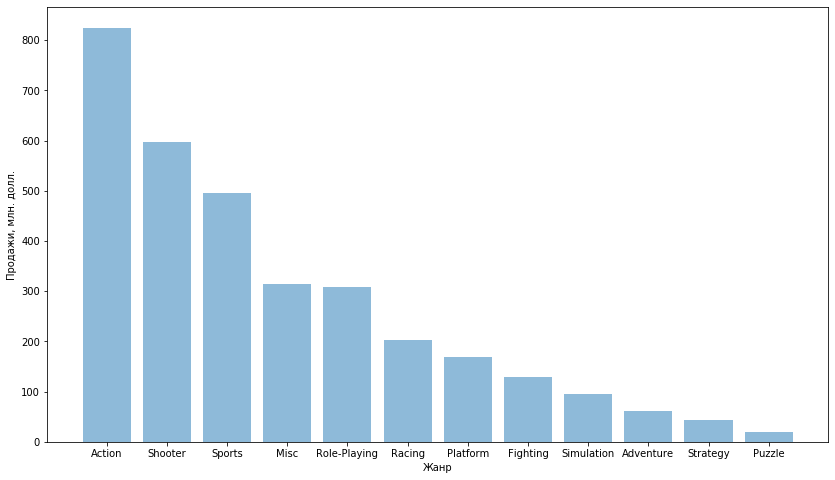

In [79]:
plt.figure(figsize=(14, 8))
plt.bar(df_recent_sales.index, df_recent_sales['total_sales'], alpha=0.5)
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн. долл.')
plt.show()

Если позиции определенного жанра по количеству и продажам серьезно различаются, то можно сделать предположение о средней выручке на игру в рамках определенного жанра. Игр жанра Shooter, например, выпускается гораздо меньше, чем Action, но в денежном выражении эта разница становится куда менее ощутимой, что говорит о том, что средняя выручка у Shooter'ов выше, чем у игр жанра Action. В то же время по количеству игры жанра Adventure находятся на 6-ом месте, а по продажам на 10-ом, что говорит о том, что средние продажи одной игры для данного жанра ниже, чем у тех же Role-Playing игр.

### Вывод для шага 3

На данном этапе исследования мы определили средний срок жизни игровой платформы, и уже по нему выделили релевантный временной промежуток (начиная с 2008 года) и список платформ, которые останутся актуальными в 2017. На основании этих данных и производятся дальнейшие расчеты.

Мы также выяснили, что ни отзывы пользователей, ни отзывы критиков существенным образом не влияют на продажи. Во всяком случае, для трех платформ с наибольшим объемом продаж линейная связь между этими признаками отсутствует.

Наконец, мы установили, что не все игровые жанры одинаково популярных (и по количеству выпущенных игр, и по общему продаж). Так, самое большое количество игр выходило в жанрах Action, Sports и Misc. Самые высокие продажи продемонстрировали жанры Action, Shooter, Sports. По расхождению в том, какое место жанр занимает в рейтинге по количеству игр и по продажам можно говорить и о том, что средняя выручка игр в рамках разных жанров также будет существенно отличаться.

### Шаг 4. Портрет пользователя

#### Топ платформ по регионам

Выясним, какие платформы из актуального списка предпочитают пользователи каждого из трех географических регионов: Северной Америки, Европы и Японии. Напомним, что список выглядит вот так:

In [80]:
new_platforms

0     3DS
1      PC
2     PS3
3     PS4
4     PSV
5     Wii
6    WiiU
7    X360
8    XOne
Name: platform, dtype: object

Рассчитаем продажи игр по каждой платформе для североамериканского региона и процент от общих продаж.

In [81]:
na_platforms = df_recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_platforms = pd.DataFrame(na_platforms)
na_platforms

,na_sales
platform,
X360,490.69
PS3,349.13
Wii,332.87
PS4,108.74
XOne,93.12
3DS,82.65
PC,41.07
WiiU,38.10
PSV,12.47


In [82]:
na_sum_sales = na_platforms['na_sales'].sum()
na_platforms['percent_sales'] = ((na_platforms['na_sales'] / na_sum_sales)*100).round(1)
na_platforms

,na_sales,percent_sales
platform,,
X360,490.69,31.7
PS3,349.13,22.5
Wii,332.87,21.5
PS4,108.74,7.0
XOne,93.12,6.0
3DS,82.65,5.3
PC,41.07,2.7
WiiU,38.10,2.5
PSV,12.47,0.8


На выбранном временном отрезке и среди выбранных платформ в Северной Америке наиболее популярными были XBox 360, PlayStation 3 и Nintendo Wii.

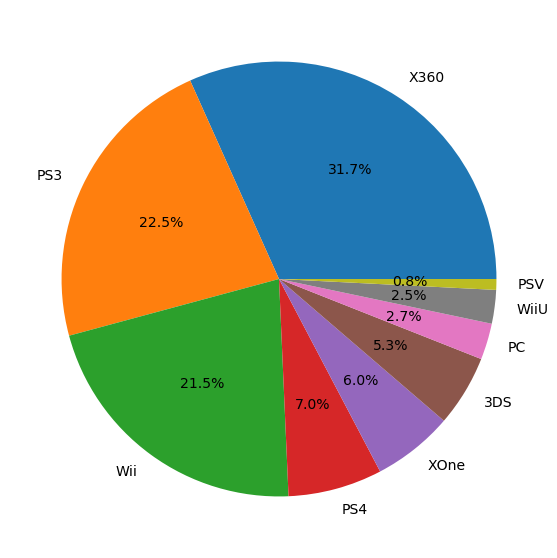

In [83]:
fracs = na_platforms['percent_sales']
labels = na_platforms.index

plt.figure(figsize=(10,10))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

Рассчитаем продажи игр по каждой платформе для Европы и процент от общих продаж.

In [84]:
eu_platforms = df_recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_platforms = pd.DataFrame(eu_platforms)
eu_platforms

,eu_sales
platform,
PS3,293.73
X360,234.88
Wii,170.74
PS4,141.09
PC,92.17
3DS,61.27
XOne,51.59
WiiU,25.13
PSV,13.07


In [85]:
eu_sum_sales = eu_platforms['eu_sales'].sum()
eu_platforms['percent_sales'] = ((eu_platforms['eu_sales'] / eu_sum_sales)*100).round(1)
eu_platforms

,eu_sales,percent_sales
platform,,
PS3,293.73,27.1
X360,234.88,21.7
Wii,170.74,15.8
PS4,141.09,13.0
PC,92.17,8.5
3DS,61.27,5.7
XOne,51.59,4.8
WiiU,25.13,2.3
PSV,13.07,1.2


Видим, что тройка лидеров для Европы выглядит несколько иначе. На первом месте — PlayStation 3, XBox 360 и Nintendo Wii на втором и третьем соответственно.

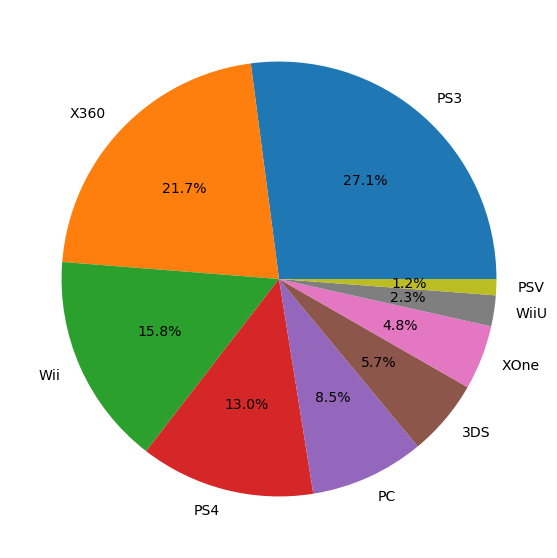

In [86]:
fracs = eu_platforms['percent_sales']
labels = eu_platforms.index

plt.figure(figsize=(10,10))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

Сделаем то же самое и для Японии.

In [87]:
jp_platforms = df_recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_platforms = pd.DataFrame(jp_platforms)
jp_platforms

,jp_sales
platform,
3DS,100.62
PS3,74.11
Wii,47.01
PSV,21.84
PS4,15.96
WiiU,13.01
X360,9.30
XOne,0.34
PC,0.00


In [88]:
jp_sum_sales = jp_platforms['jp_sales'].sum()
jp_platforms['percent_sales'] = ((jp_platforms['jp_sales'] / jp_sum_sales)*100).round(1)
jp_platforms

,jp_sales,percent_sales
platform,,
3DS,100.62,35.7
PS3,74.11,26.3
Wii,47.01,16.7
PSV,21.84,7.7
PS4,15.96,5.7
WiiU,13.01,4.6
X360,9.30,3.3
XOne,0.34,0.1
PC,0.00,0.0


Самой популярной платформой оказалась Nintendo 3DS, следом за ней PS3 и лишь потом Wii.

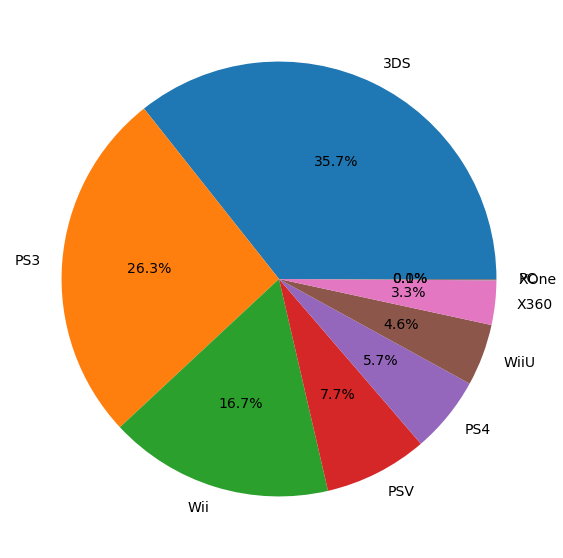

In [89]:
fracs = jp_platforms['percent_sales']
labels = jp_platforms.index

plt.figure(figsize=(10,10))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

У каждого из трех рассмотренных регионов есть свои предпочтения в выборе игровых платформ. Для Северной Америки это XBox. Что характерно, Microsoft, выпускающий данную приставку — американская компания. В Европе мнения разделились, хотя PS3 все же пользуется большей популярностью, а вот в Японии все 3 места занимают приставки японских компаний. PS3 от Sony и 3DS и Wii от Nintendo.

#### Топ жанров по регионам

Выясним, игры каких жанров предпочитают пользователи каждого региона. Начнем с Северной Америки.

In [90]:
na_genres = df_recent.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_genres = pd.DataFrame(na_genres)
na_genres

,na_sales
genre,
Action,376.76
Shooter,305.31
Sports,250.86
Misc,175.41
Role-Playing,121.87
Racing,84.44
Platform,79.55
Fighting,68.12
Simulation,35.51


In [91]:
na_sum_gen = na_genres['na_sales'].sum()
na_genres['percent_sales'] = ((na_genres['na_sales'] / na_sum_gen)*100).round(1)
na_genres

,na_sales,percent_sales
genre,,
Action,376.76,24.3
Shooter,305.31,19.7
Sports,250.86,16.2
Misc,175.41,11.3
Role-Playing,121.87,7.9
Racing,84.44,5.5
Platform,79.55,5.1
Fighting,68.12,4.4
Simulation,35.51,2.3


Первые три места: Action, Shooter, Sports. Жанру Action при этом принадлежит четверть всего рынка, Shooter — 20%, Sports — 16%. На три самых популярных жанра приходится 60% всего североамериканского рынка.

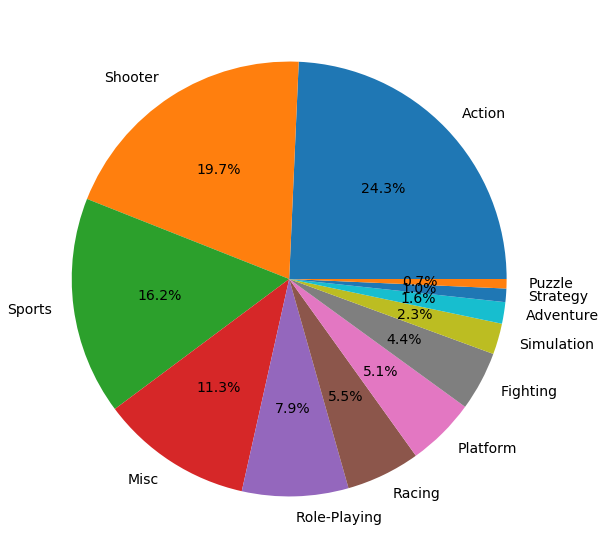

In [92]:
fracs = na_genres['percent_sales']
labels = na_genres.index

plt.figure(figsize=(10,10))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

Посмотрим, как выглядит рейтинг популярных жанр в Европе.

In [93]:
eu_genres = df_recent.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_genres = pd.DataFrame(eu_genres)
eu_genres

,eu_sales
genre,
Action,283.46
Shooter,206.47
Sports,169.02
Misc,89.47
Racing,84.49
Role-Playing,81.39
Platform,52.96
Simulation,38.64
Fighting,32.10


In [94]:
eu_sum_gen = eu_genres['eu_sales'].sum()
eu_genres['percent_sales'] = ((eu_genres['eu_sales'] / eu_sum_gen)*100).round(1)
eu_genres

,eu_sales,percent_sales
genre,,
Action,283.46,26.2
Shooter,206.47,19.1
Sports,169.02,15.6
Misc,89.47,8.3
Racing,84.49,7.8
Role-Playing,81.39,7.5
Platform,52.96,4.9
Simulation,38.64,3.6
Fighting,32.10,3.0


Тройка лидеров ничем не отличается. Даже в процентном отношении европейские геймеры предпочитают примерно те же жанры. Тройка лидеров занимает 61% европейского рынка видеоигр.

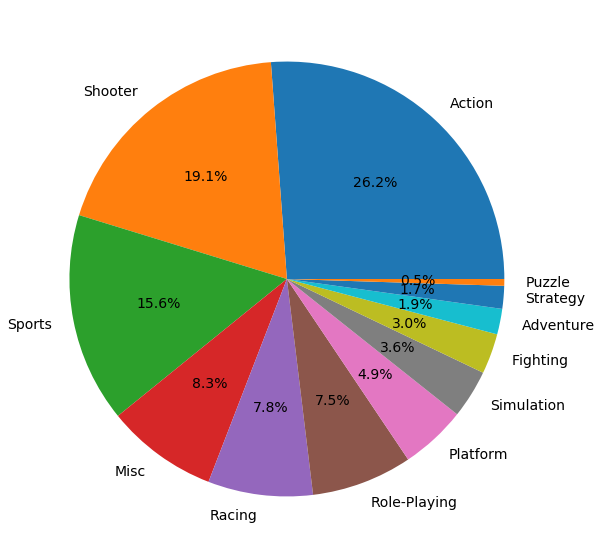

In [95]:
fracs = eu_genres['percent_sales']
labels = eu_genres.index

plt.figure(figsize=(10,10))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

Взглянем на ситуацию в Японии.

In [96]:
jp_genres = df_recent.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_genres = pd.DataFrame(jp_genres)
jp_genres

,jp_sales
genre,
Role-Playing,77.29
Action,69.85
Sports,20.97
Misc,20.80
Platform,20.56
Fighting,15.98
Shooter,15.57
Simulation,13.58
Racing,10.92


In [97]:
jp_sum_gen = jp_genres['jp_sales'].sum()
jp_genres['percent_sales'] = ((jp_genres['jp_sales'] / jp_sum_gen)*100).round(1)
jp_genres

,jp_sales,percent_sales
genre,,
Role-Playing,77.29,27.4
Action,69.85,24.8
Sports,20.97,7.4
Misc,20.80,7.4
Platform,20.56,7.3
Fighting,15.98,5.7
Shooter,15.57,5.5
Simulation,13.58,4.8
Racing,10.92,3.9


На первом месте с 27% рынка игры жанра РПГ. На втором — Action с 25% рынка. На третьем — спортивные симуляторы. На них приходится чуть больше 7% японского рынка. На три самых популярных жанра приходится 60% всего рынка.

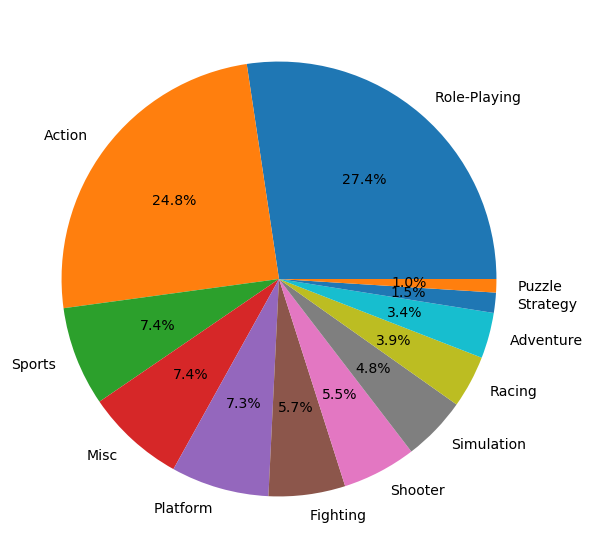

In [98]:
fracs = jp_genres['percent_sales']
labels = jp_genres.index

plt.figure(figsize=(10,10))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

#### Влияние рейтинга на продажи

Посмотрим, как распределены продажи игр в Северной Америке по рейтингу ESRB.

In [99]:
na_rating = df_recent.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_rating = pd.DataFrame(na_rating)
na_rating

,na_sales
rating,
M,497.10
E,407.66
T,274.35
E10+,203.70
EC,0.71
RP,0.00


In [100]:
na_sum_gen = na_rating['na_sales'].sum()
na_rating['percent_sales'] = ((na_rating['na_sales'] / na_sum_gen)*100).round(1)
na_rating

,na_sales,percent_sales
rating,,
M,497.10,35.9
E,407.66,29.5
T,274.35,19.8
E10+,203.70,14.7
EC,0.71,0.1
RP,0.00,0.0


36% всех игр, продаваемых в Северной Америке, обладает рейтингом Mature. Еще 30% — рейтингом Everyone. 20% у игр с рейтингом Teen. Everyone 10+ — чуть меньше 15%. Игр с рейтингом EC и RP в рейтинге практически нет.

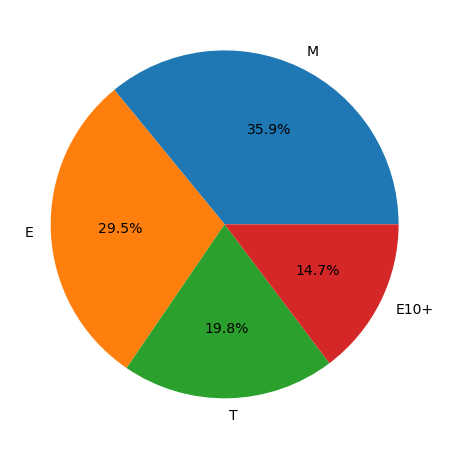

In [101]:
fracs = na_rating['percent_sales'][0:4]
labels = na_rating[0:4].index

plt.figure(figsize=(8, 8))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

Каким образом распределены продажи игр по рейтингу в Европе?

In [102]:
eu_rating = df_recent.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rating = pd.DataFrame(eu_rating)
eu_rating

,eu_sales
rating,
M,358.42
E,273.22
T,176.37
E10+,120.80
RP,0.03
EC,0.00


In [103]:
eu_sum_gen = eu_rating['eu_sales'].sum()
eu_rating['percent_sales'] = ((eu_rating['eu_sales'] / eu_sum_gen)*100).round(1)
eu_rating

,eu_sales,percent_sales
rating,,
M,358.42,38.6
E,273.22,29.4
T,176.37,19.0
E10+,120.80,13.0
RP,0.03,0.0
EC,0.00,0.0


Почти 39% всех игр, продаваемых в Европе, обладает рейтингом Mature. Еще 30% — рейтингом Everyone. 19% у игр с рейтингом Teen. Everyone 10+ — 13%. Игр с рейтингом EC и RP в рейтинге практически нет.

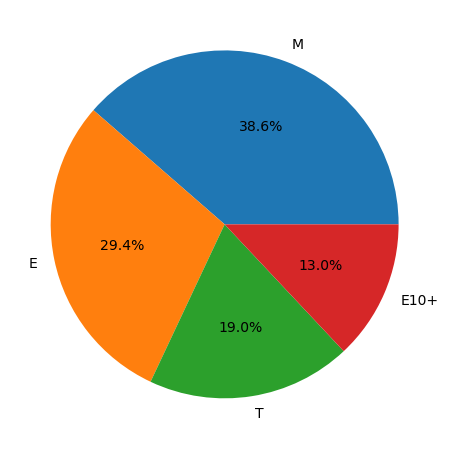

In [104]:
fracs = eu_rating['percent_sales'][0:4]
labels = eu_rating[0:4].index

plt.figure(figsize=(8, 8))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

Посмотрим, как выглядит распределение для Японии.

In [105]:
jp_rating = df_recent.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_rating = pd.DataFrame(jp_rating)
jp_rating

,jp_sales
rating,
E,61.41
T,48.12
M,37.50
E10+,12.04
RP,0.00
EC,0.00


In [106]:
jp_sum_gen = jp_rating['jp_sales'].sum()
jp_rating['percent_sales'] = ((jp_rating['jp_sales'] / jp_sum_gen)*100).round(1)
jp_rating

,jp_sales,percent_sales
rating,,
E,61.41,38.6
T,48.12,30.3
M,37.50,23.6
E10+,12.04,7.6
RP,0.00,0.0
EC,0.00,0.0


В Японии гораздо большей популярностью пользуются игры, рассчитанные на людей всех возрастов (то есть те игры, в которых не встречаются реалистичное насилие, сцены сексуального характера и обсценная лексика). На игры с рейтингом Everyone приходится почти 39% всего рынка. Чуть больше 30% у игр с рейтингом Teen. Замыкает тройку лидеров рейтинг Mature, на его долю приходится более 23% всех игр.

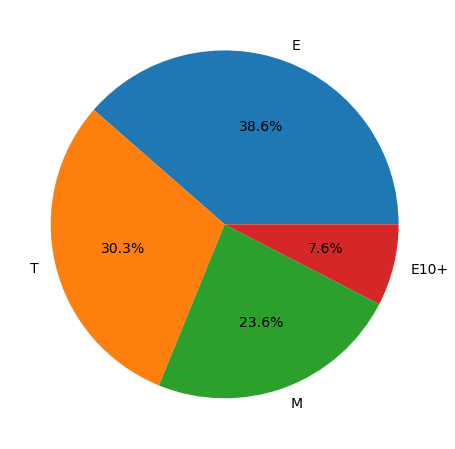

In [107]:
fracs = jp_rating['percent_sales'][0:4]
labels = jp_rating[0:4].index

plt.figure(figsize=(8, 8))
plt.pie(fracs, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

### Вывод для шага 4

На данном этапе мы определили предпочтения пользователей их трех различных регионов — Северной Америки, Европы и Японии, исследовав их по трем различным параметрам: самые популярные жанры игр, самые популярные платформы, самые популярные рейтинги игр. Удалось установить, что между всеми тремя регионами существуют существенные различия, которые, впрочем, менее выражены для Америки и Европы.

В Северной Америке самой популярной игровой приставкой является XBox (продукт американской компании). В Европе это PlatStation 3. В Японии все топ-3 платформы японского производства, на первом месте портативная Nintendo 3DS (а не стационарные консоли как в Европе и США).

Предпочтения в жанрах тоже несколько отличаются. В то время как в Европе и США предпочитают Action, Shooter и Sports(причем, в приблизительно одинаковом отношении для обоих регионов), в Японии самым популярным жанром являются РПГ, на втором и третьем местах расположились Action и Sports.

Наконец, продажи игр по регионам зависят и от рейтинга. Если в Японии наибольшей популярностью пользуются игры, рассчитанные на широкую аудиторию, в США и Европе самыми популярным остаются игры, рассчитанные в первую очередь на взрослых.

## Шаг 5. Проверка гипотез

На данном этапе исследования нам необходимо проверить две гипотезы о равенстве средних значений двух выборок. Первая пара выборок — средние пользовательские рейтинги для игр на Xbox One и PC. Вторая — средние пользовательские рейтинги жанров Action и Sports. Уровень значимости устанавливаем равным 0.05.

### Гипотеза 1
- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [108]:
results_platform = st.ttest_ind(df_user.loc[df_user['platform'] == "XOne", 'user_score'],
                                df_user.loc[df_user['platform'] == "PC", 'user_score'])

if results_platform.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
    print('P-value равно {:.6f}.'.format(results_platform.pvalue))
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

Отвергаем нулевую гипотезу
P-value равно 0.000003.


По результатам проведенного теста мы можем отвергнуть нулевую гипотезу и с вероятностью 95% (а на деле даже выше) утверждать, что средние оценки игр на ПК имеют статически значимое отличие от средних оценок игр на XBox One.

In [109]:
flat_plat = df_user.query('platform == "XOne" | platform == "PC"').groupby('platform')['user_score'].mean()
flat_plat = pd.DataFrame(flat_plat)
flat_plat

,user_score
platform,
PC,7.115131
XOne,6.578652


Взглянем на среднее для двух выборок. Действительно, разница кажется достаточно существенной. На графике это также заметно.

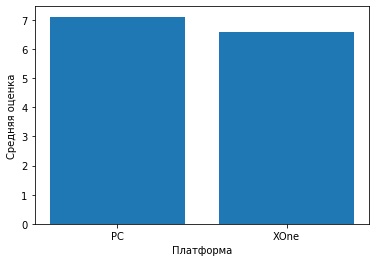

In [110]:
plt.bar(flat_plat.index, flat_plat['user_score'])
plt.ylabel('Средняя оценка')
plt.xlabel('Платформа')
plt.show()

### Гипотеза 2
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [111]:
results_genre = st.ttest_ind(df_user.loc[df_user['genre'] == "Action", 'user_score'],
                                df_user.loc[df_user['genre'] == "Sports", 'user_score'])

if results_genre.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу.')
    print('P-value равно {:.6f}.'.format(results_platform.pvalue))
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

Не удалось отвергнуть нулевую гипотезу.


В данном случае у нас недостаточно оснований, чтобы отвергнуть нулевую гипотезу, поэтому мы можем утверждать, что средние оценки для игр жанров Action и Sports одинаковы.

In [112]:
flat_genre = df_user.query('genre == "Action" | genre == "Sports"').groupby('genre')['user_score'].mean()
flat_genre = pd.DataFrame(flat_genre)
flat_genre

,user_score
genre,
Action,7.091676
Sports,7.036390


Разница средних для двух выборок не кажется существенной. То же можно сказать и глядя на график.

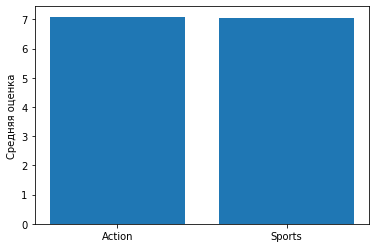

In [113]:
plt.bar(flat_genre.index, flat_genre['user_score'])
plt.ylabel('Средняя оценка')
plt.show()

### Вывод для шага 5

На завершающем этапе исследования мы проверили две пары гипотез:

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

и

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются

В первом случае удалось отвергнуть нулевую гипотезу и с уверенностью утверждать, что средние рейтинги игр на ПК и XBox One имеют статистически значимую разницу. В то же время не удалось отвергнуть нулевую гипотезу во втором случае. Таким образом можем утверждать, что средние рейтинги игр жанра Action и Sports не имеют статистически значимой разницы.

### Шаг 6. Общий вывод

На начальном этапе данного исследования был произведен беглый визуальный анализ имеющихся данных, после чего более подробно изучен каждый столбец предоставленной для работы таблицы. После этого стало возможным от пропусков там, где это было необходимо и заменить тип данных в двух столбцах.

На основании полученных мы определили средний срок жизни игровой платформы, который составляет порядка 10 лет. На его основании был составлен список релевантных платформ, актуальных на 2017. Дальнейшие расчеты проводятся уже для этих платформ. Мы также выяснили, что линейная связь между отзывами пользователей/критиков и глобальными продажами отсутствует. В ходе проведения исследования выяснилось, что не все игровые жанры одинаково популярных (и по количеству выпущенных игр, и по продаж). Самыми популярными жанрами являются Action, Shooter, Sports и Misc. Также можно заявлять, что средняя выручка игр в рамках разных жанров также будет существенно отличаться.

Мы определили игровые предпочтения пользователей из Северной Америки, Европы и Японии. В Северной Америке самой популярной игровой приставкой является XBox. В Европе это PlayStation 3. В Японии — Nintendo 3DS. Предпочтения по жанрам тоже несколько различаются. В Европе и США игроки предпочитают Action, Shooter и Sports, в Японии — РПГ, Action и Sports. Продажи игр по регионам также зависят и от их рейтинга. Если в Японии наибольшей популярностью пользуются игры, рассчитанные на широкую аудиторию, в США и Европе самыми популярным остаются игры, рассчитанные в первую очередь на взрослых.

На завершающем этапе исследования мы проверили две пары гипотез о равенстве средних. В первом случае для пользовательских рейтингов платформ Xbox One и PC. Во втором — для рейтинги жанров Action и Sports. Выяснилось, что средние рейтинги игр на ПК и XBox One имеют статистически значимую разницу. В то же время средние рейтинги игр жанра Action и Sports не имеют статистически значимой разницы.